In [1]:
%load_ext autotime
import warnings; warnings.filterwarnings('ignore')

In [2]:
import numpy as np, pandas as pd, geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio import features
from sklearn.ensemble import RandomForestClassifier

time: 934 ms


/home/pankaj/.local/Anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
train_dir = './trainingdata/'
labels = ['water', 'cropland', 'forest', 'built-up', 'snow']
dic = {'water':1, 'cropland':2, 'forest':5, 'built-up':3, 'snow':8, 'mixforest':6}

time: 1.07 ms


In [4]:
train1 = gpd.read_file(train_dir + 'training.shp').to_crs({'init':'epsg:4326'})
train2 = gpd.read_file(train_dir + 'training_2.shp').to_crs({'init':'epsg:4326'})
train1.ClassStr.unique()

array([u'Water', u'Forest', u'Snow/Cloud', u'Cropland', u'Mix forest',
       u'Grassland', u'Built-up', u'Rocky', u'Sno/Cloud'], dtype=object)

time: 127 ms


In [5]:
train3 = gpd.GeoDataFrame([])
for cl in [1,2,3,5,6,8]:
    temp = train1[train1.Class==cl]
    train3 = pd.concat([train3, temp], axis=0)

time: 75.4 ms


In [6]:
train4 = gpd.GeoDataFrame([])
for cl in [1,2,3,5,6,8]:
    temp = train2[train2.Class==cl]
    train4 = pd.concat([train4, temp], axis=0)

time: 100 ms


In [7]:
newdic = {'snow':5, 'water':1, 'cropland':2, 'forest':4, 'built-up':3}
train = pd.concat([train3, train4], axis=0).reset_index().drop(['index'], axis=1)
train.Class[train.Class==5] = 4
train.Class[train.Class==6] = 4
train.Class[train.Class==8] = 5
train.Class.unique()

array([1, 2, 3, 4, 5])

time: 212 ms


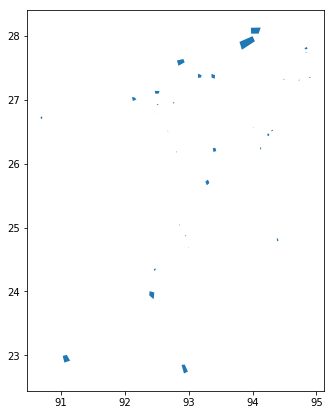

time: 261 ms


In [8]:
train[train.Class==4].plot(figsize=(7,7))
plt.show()

In [9]:
rst = rasterio.open('/mnt/ext1/data/sur/lulc/mosaic.tif')
meta = rst.meta.copy()
meta.update(compress='lzw', dtype='uint8', count=1)
with rasterio.open('train.tif', 'w', **meta) as outfile:
    shapes = ((geom, value) for geom, value in zip(train.geometry, train.Class))
    burned = features.rasterize(shapes=shapes, fill=0, out_shape=rst.shape, \
                                transform=rst.transform)
    outfile.write_band(1, burned)

time: 6.51 s


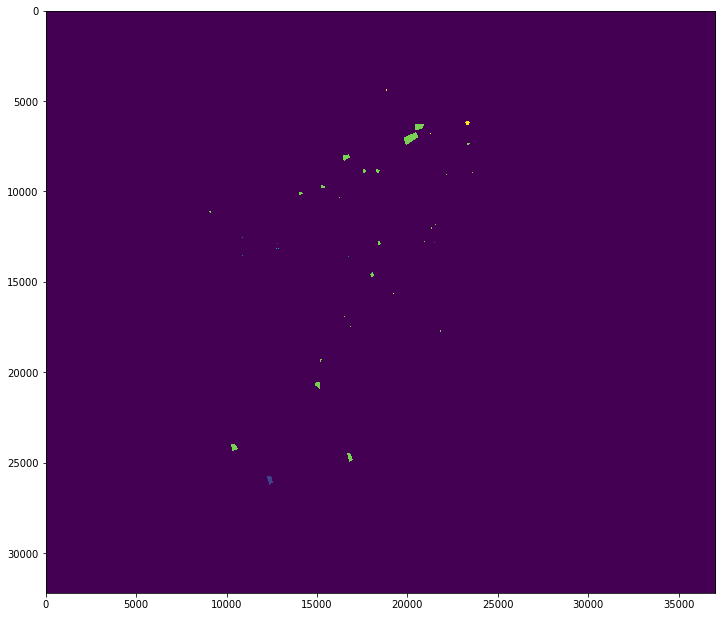

time: 23.1 s


In [10]:
roi = rasterio.open('train.tif').read(1)
fig, ax = plt.subplots(1,1,figsize=(12,12))
ax.imshow(roi)
plt.show()